<a href="https://colab.research.google.com/github/punjabinuclei/RealTimeBatteryMonitoringSystem/blob/main/2.Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **State of Charge Estimation using Machine Learning** 

Why linear regression? Linear regression is an algorithm used to predict values that are continuous in nature.

To predict the state of charget we are going to use the following linear regression algorithms: Ordinal Least Square (OLS) algorithm, Ridge regression algorithm, Lasso regression algorithm, Bayesian regression algorithm, and lastly Elastic Net regression algorithm.

# Importing Important Libraries




Our primary packages for this project are going to be pandas for data processing, NumPy to work with arrays, matplotlib & seaborn for data visualizations, and finally scikit-learn for building an evaluating our ML model. Let’s import all the required packages into our python environment.

In [41]:

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization
from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import Lasso # Lasso algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10)
from sklearn import preprocessing # preprocessData

# Loading our Dataset

Using the ‘read_csv’ function provided by the Pandas package, we can import the data into our python environment. After importing the data, we can use the ‘head’ function to get a glimpse of our dataset.

In [42]:
df=pd.read_csv(r"SocFinal.csv")
df=df.dropna()
df

,Voltage,Current,Temperature,Capacity,StandardDeviation,DCResistance,MeanofVariables,StateofCharge
0,4.17604,-0.15069,23.97615,2.99746,11.492914,-0.039153,7.001010,99.915333
1,4.17014,-0.15069,23.97615,2.99239,11.492369,-0.016789,7.000802,99.746333
2,4.16761,-0.15069,23.76583,2.98986,11.388522,-0.016444,6.948222,99.662000
3,4.16509,-0.15325,23.66067,2.98732,11.336982,-0.015400,6.921297,99.577333
4,4.16273,-0.15325,23.76583,2.98478,11.388420,-0.014600,6.947633,99.492667
...,...,...,...,...,...,...,...,...
14952,2.80077,-11.13838,8.83332,0.52128,8.443293,-0.000061,0.743607,17.376000
14953,2.80010,-10.93406,8.83332,0.52099,8.347490,-0.000016,0.794593,17.366333
14954,2.79993,-10.88298,8.83332,0.52099,8.323558,0.000117,0.807320,17.366333
14955,2.80178,-15.74596,8.93848,0.53256,10.664245,-0.000108,-0.384565,17.752000


Now, using the ‘describe’ function we can get a statistical view of the data like mean, median, standard deviation, and so on.

In [43]:
df.describe()

,Voltage,Current,Temperature,Capacity,StandardDeviation,DCResistance,MeanofVariables,StateofCharge
count,14957.000000,14957.000000,14957.000000,14957.000000,14957.000000,14957.000000,14957.000000,14957.000000
mean,3.554937,-8.051821,23.956558,1.770932,13.864357,-0.000179,5.172185,59.031066
std,0.321793,6.020962,11.026994,0.840430,5.428575,0.018174,3.141481,28.014331
min,2.794530,-18.001220,8.833320,0.219260,4.824173,-0.075889,-1.186117,7.308667
25%,3.322290,-11.999110,9.148790,0.968320,11.214714,-0.000197,2.599035,32.277333
50%,3.580020,-5.999560,23.870990,1.792820,12.642406,-0.000088,6.056997,59.760667
75%,3.821390,-3.001060,38.382860,2.638830,19.092191,-0.000057,7.256017,87.961000
max,4.176040,-0.150690,38.698340,3.000000,23.642281,0.872670,10.305742,100.000000


### **Data Visualization**

In this process, we are going to produce three different types of charts including heatmap, scatter plot, and a distribution plot.

(i) **Heatmap**:
Heatmaps are very useful to find relations between two variables in a dataset. Heatmap can be easily produced using the ‘heatmap’ function provided by the seaborn package in python.

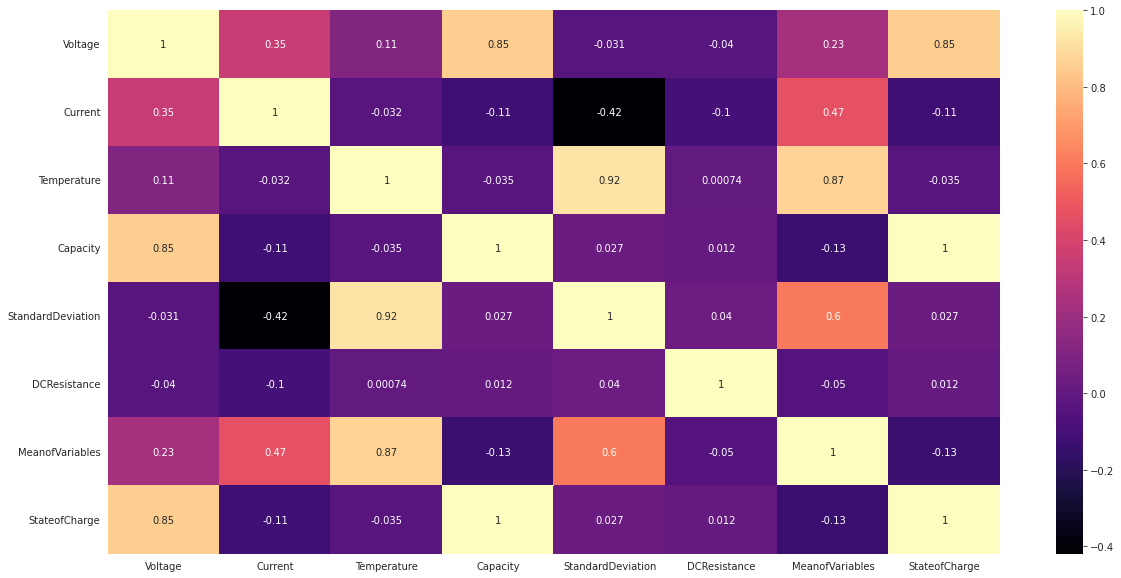

In [44]:
import seaborn as sb # visualization
import matplotlib.pyplot as plt # visualization

sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

## **Feature Selection & Data Split**
 In this process we are going to define the ‘X’ variable (independent variable) and the ‘Y’ variable (dependent variable). After defining the variables, we will use them to split the data into a train set and test set. Splitting the data can be done using the ‘train_test_split’ function provided by scikit-learn in python.

In [45]:
features = ['Voltage','Current','Temperature', 'Capacity', 'StandardDeviation', 'DCResistance', 'MeanofVariables']
X = df.loc[:, features]
y = df.loc[:, ['StateofCharge']]

In [46]:
# 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)

In [47]:
y_val.head()

,StateofCharge
2127,89.918667
5067,31.539667
939,20.461000
7894,79.582333
13572,49.963667


## **Modeling**
In this process, we are going to build and train five different types of linear regression models which are the OLS model, Ridge regression model, Lasso regression model, Bayesian regression model, Elastic Net regression model. For all the models, we are going to use the pre-built algorithms provided by the scikit-learn package in python. And the process for all the models are the same, first, we define a variable to store the model algorithm, next, we fit the train set variables into the model, and finally make some predictions in the test set.

Training the Model

In [57]:
# MODELING


#  Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat_test = lasso.predict(X_test)
lasso_yhat_val = lasso.predict(X_val)


## **Model Evaluation**
To evaluate our model we are going to use the ‘explained_variance_score’ metric and the ‘r2_score’ metric functions which are provided by the scikit-learn package in python.

When it comes to the ‘explained_variance_score’ metric, the score should not below 0.60 or 60%. If it is the case, then our built model is not sufficient for our data to solve the given case. So, the ideal score of the ‘explained_variance_score’ should be between 0.60 and 1.0.

Our next evaluation metric is the ‘r2_score’ (R-squared) metric. What is R-squared? R-squared is a measurement of how well the dependent variable explains the variance of the independent variable. It is the most popular evaluation metric for regression models. The ideal ‘r2_score’ of a build should be more than 0.70 (at least > 0.60).

We are now going to compare the metric scores of each model and choose which model is more suitable for the given dataset.

In [58]:
# 1. Explained Variance Score

print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat_test)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.9999998148055026
-------------------------------------------------------------------------------


In [59]:
# 2. R-squared

print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat_test)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.9999998146636007
-------------------------------------------------------------------------------


With Validation Data

In [60]:
# 1. Explained Variance Score

print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_val, lasso_yhat_val)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.9999998135841598
-------------------------------------------------------------------------------


In [61]:
# 2. R-squared

print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_val, lasso_yhat_val)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.9999998132931261
-------------------------------------------------------------------------------


In [62]:
X_test.iloc[0].values.reshape(1,-1)

array([[ 3.90803000e+00, -2.89889000e+00,  9.04363000e+00,
         2.41436000e+00,  5.08306134e+00, -1.13837000e-04,
         2.65960250e+00]])

In [63]:
lasso.predict(X_test.iloc[0].values.reshape(1,-1) )

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([80.47080992])

In [64]:
y_test.iloc[0]

StateofCharge    80.478667
Name: 12088, dtype: float64